In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('house_train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

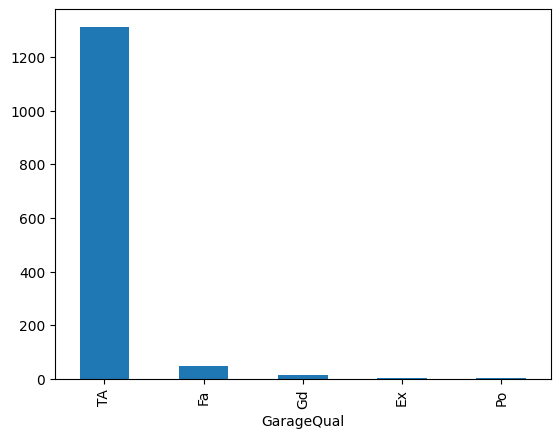

In [5]:
df['GarageQual'].value_counts().plot(kind='bar')

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [7]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [8]:
df['GarageQual'] = df['GarageQual'].fillna('TA')

<Axes: xlabel='GarageQual'>

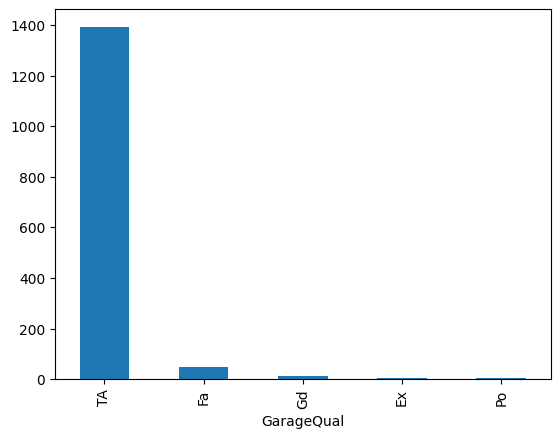

In [9]:
df['GarageQual'].value_counts().plot(kind='bar') # here observe that 'TA' is now increased than before one, because ye fill NaN cells to 'TA' whcih was the mode

<Axes: xlabel='FireplaceQu'>

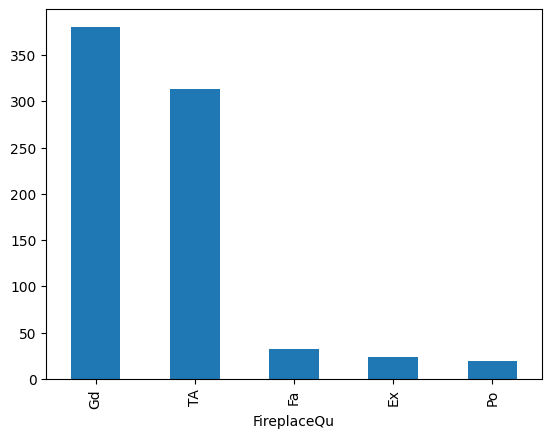

In [10]:
# this is a columns where the empty rows are nearly 50 %
df['FireplaceQu'].value_counts().plot(kind='bar')

In [11]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [12]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [13]:
df['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\write\AppData\Local\Temp\ipykernel_16632\3912738894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

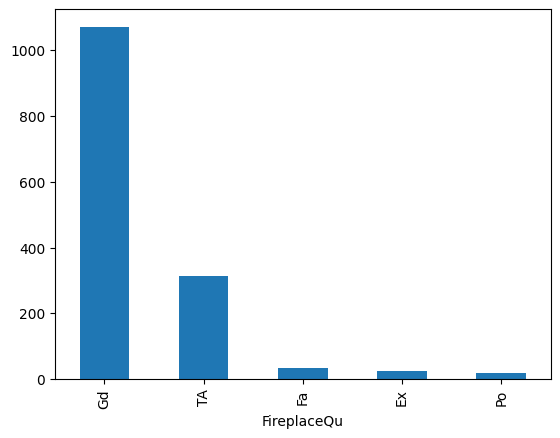

In [14]:
df['FireplaceQu'].value_counts().plot(kind='bar')

## Using SkLearn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [16]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [17]:
imputer = SimpleImputer(strategy='most_frequent')

In [18]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\write\Desktop\ai\AI-Development\ML\virtual_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [19]:
# Now Simple Imputer is trained, we can use it by passing into ColumnTransformer or PipeLine

In [20]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# Another Method

we can also do this if there is null columns are more, we can insert the other categorical value like 'missing' , so machine learning algorithm can handle that

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size = 0.2)

In [24]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing') # we are filling value = 'Missing' inplace of NaN cell